<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

<b>Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.</b>

Dataset can be downloaded from <a href="https://www.kaggle.com/c/titanic/data">Kaggle.</a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
df.keys

<bound method NDFrame.keys of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"O'Dwyer, Miss. Ellen ""Nellie""",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.describe().style.background_gradient(cmap='autumn', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408, vmin=None, vmax=None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
PassengerId,int64,891,[ 1 2 3 4 5 6 7 8 9 10 11 ...
Survived,int64,2,[0 1]
Pclass,int64,3,[3 1 2]
Name,object,891,"['Braund, Mr. Owen Harris'\n 'Cumings, Mrs. Jo..."
Sex,object,2,['male' 'female']
Age,float64,88,[22. 38. 26. 35. nan 54. 2. 27....
SibSp,int64,7,[1 0 3 4 2 5 8]
Parch,int64,7,[0 1 2 5 3 4 6]
Ticket,object,681,['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '11...
Fare,float64,248,[ 7.25 71.2833 7.925 53.1 8.05 ...


In [10]:
df.kurt()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

In [11]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [12]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object')]

In [15]:
df.items

<bound method DataFrame.items of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [16]:
df.ndim

2

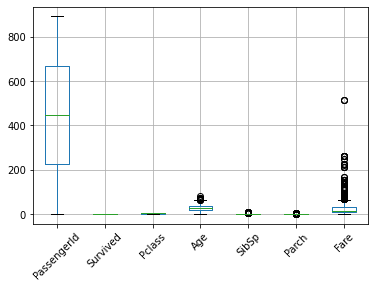

In [17]:
df.boxplot(rot=45)
plt.show()

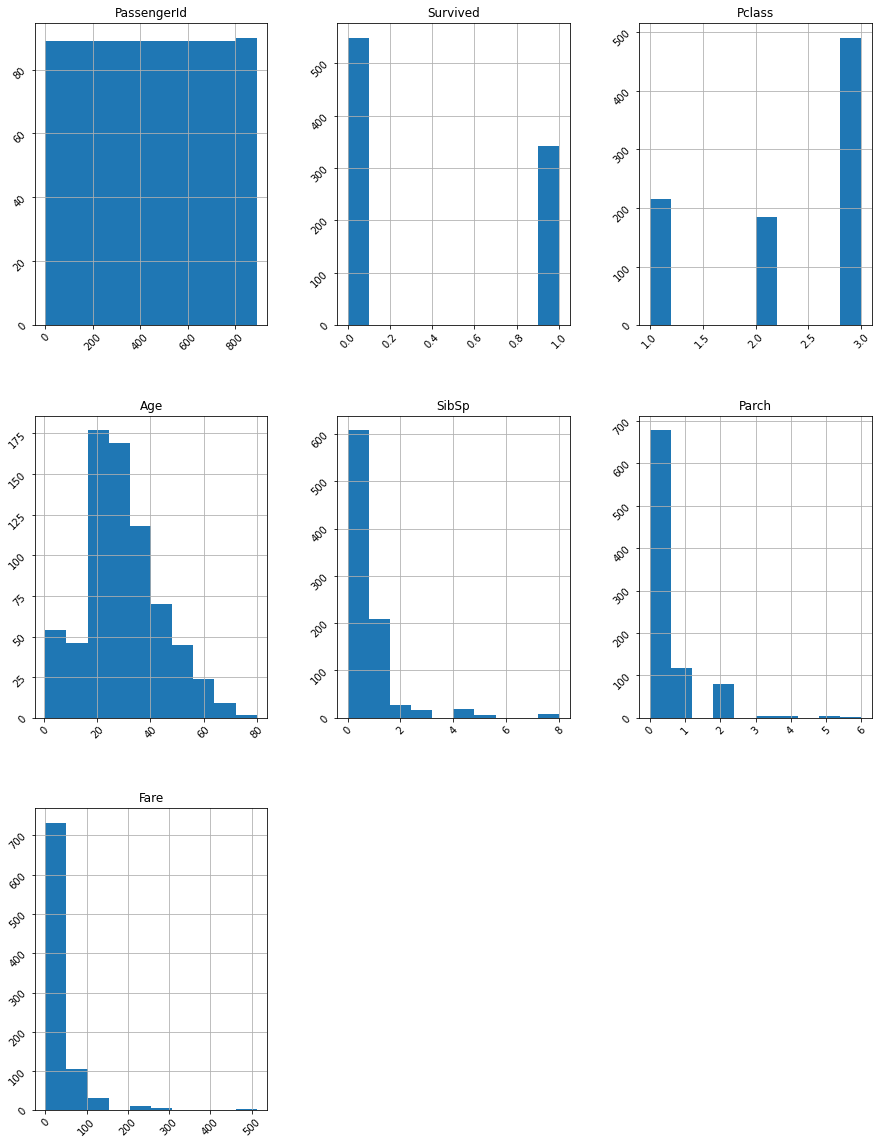

In [18]:
df.hist(figsize=(15,20),xrot=45,yrot=45)
plt.show()

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df.duplicated().any()

False

In [21]:
df.duplicated().sum() 

0

In [22]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

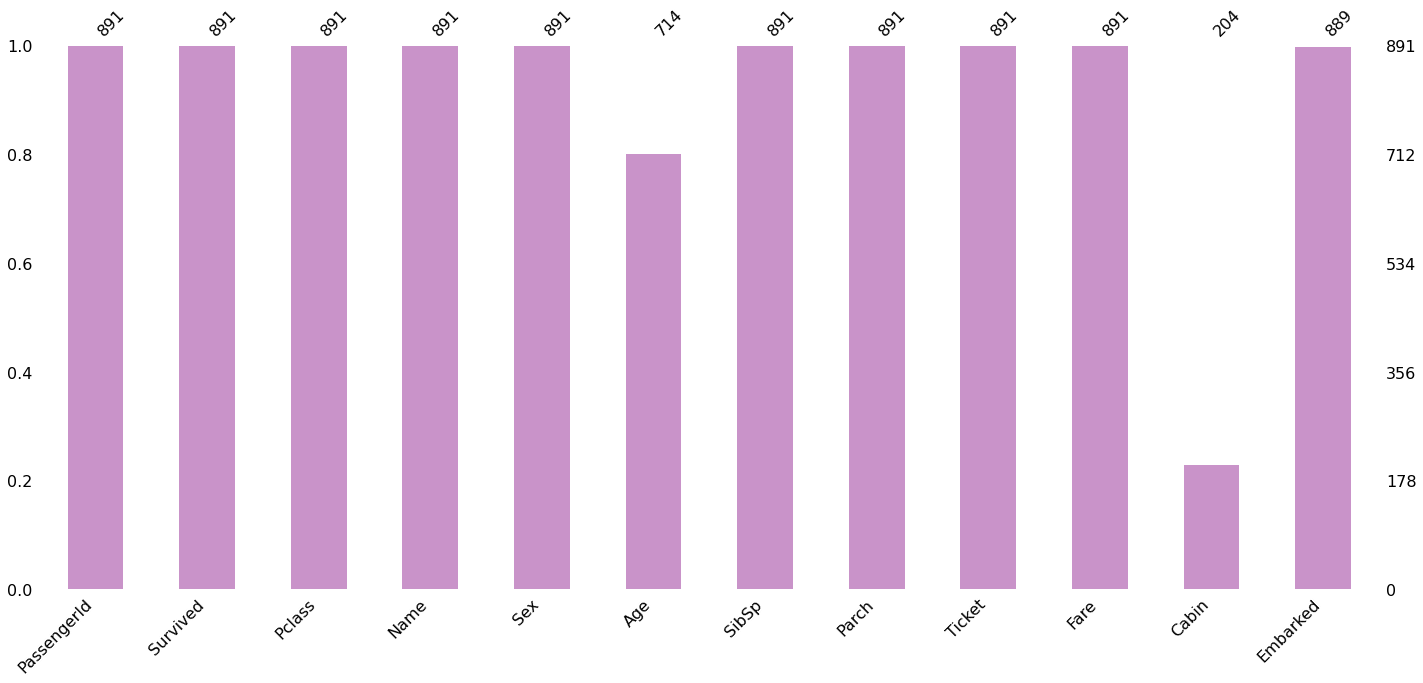

In [25]:
msno.bar(df.sample(891),color=(0.7, 0.4, 0.7, 0.7))
plt.show()

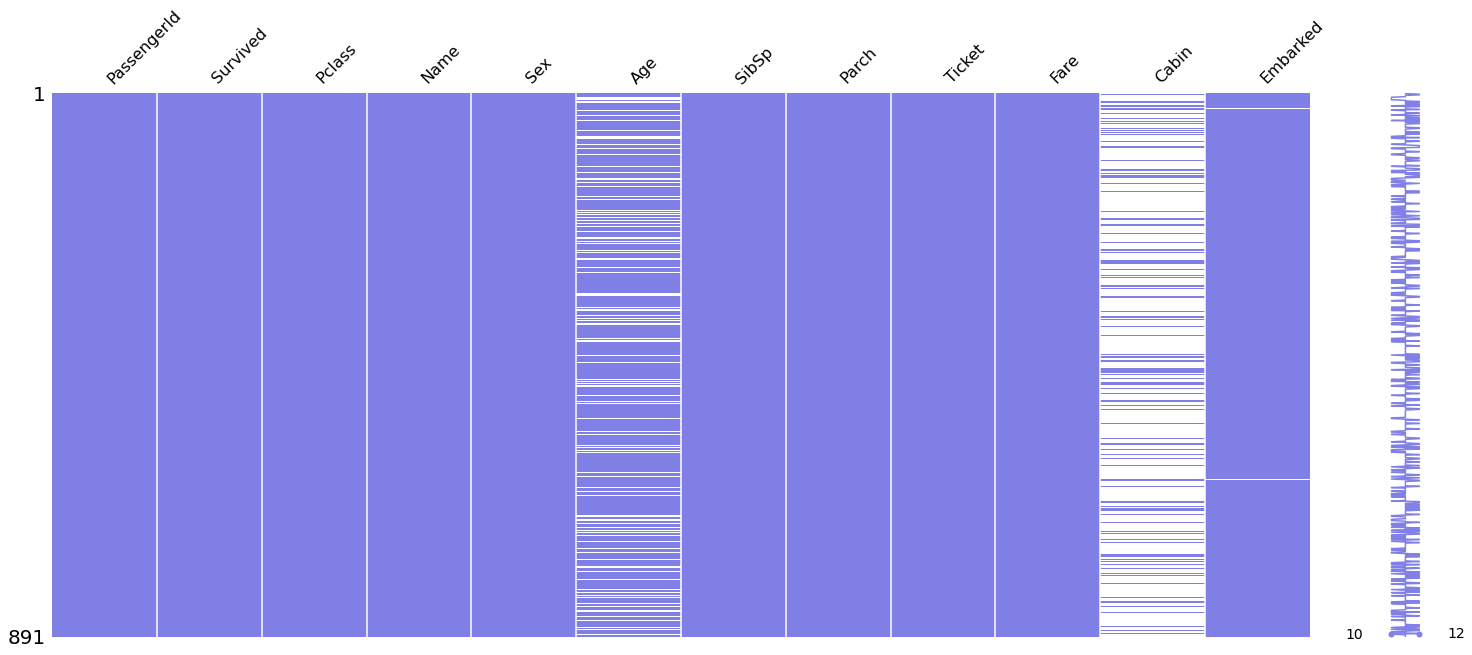

In [26]:
msno.matrix(df.sample(891),color=(0.5, 0.5, 0.9))
plt.show()

In [27]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("Number of Missing Values Left in the Training Data :", df.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


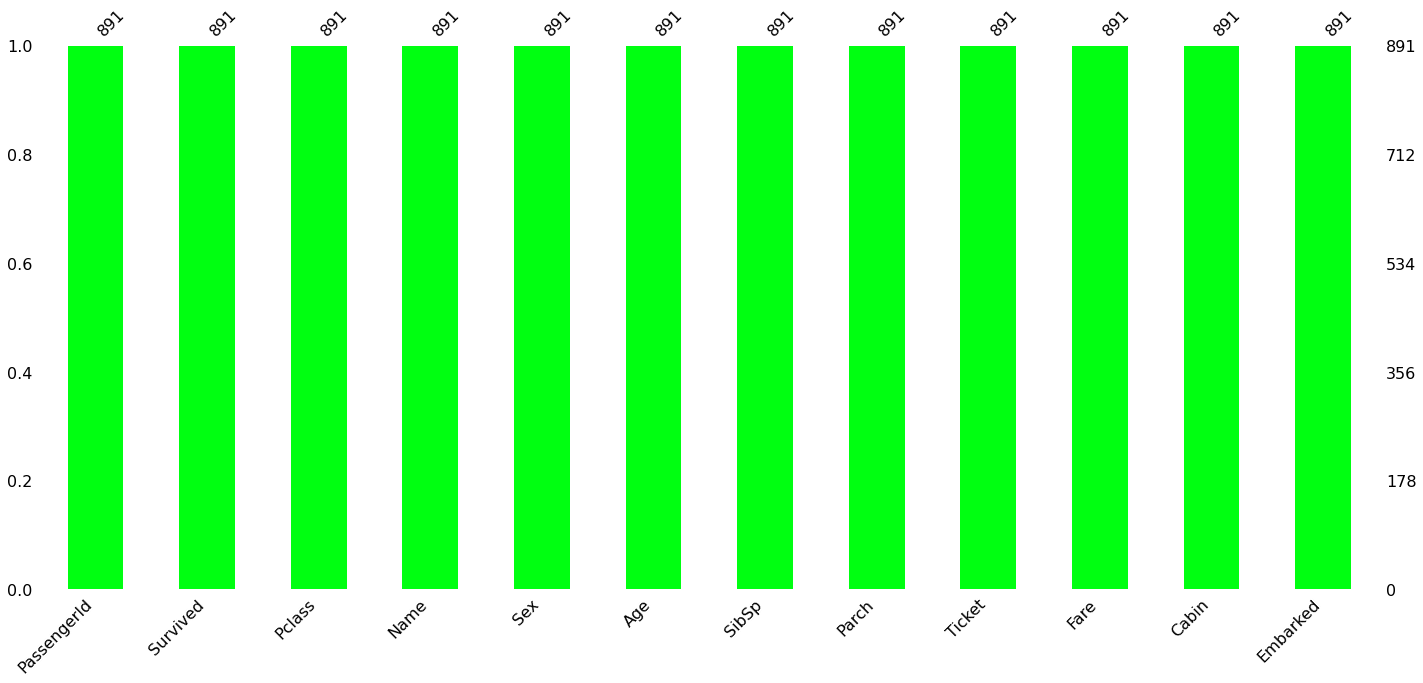

In [28]:
msno.bar(df.sample(891),color=("#00FF11"))
plt.show()

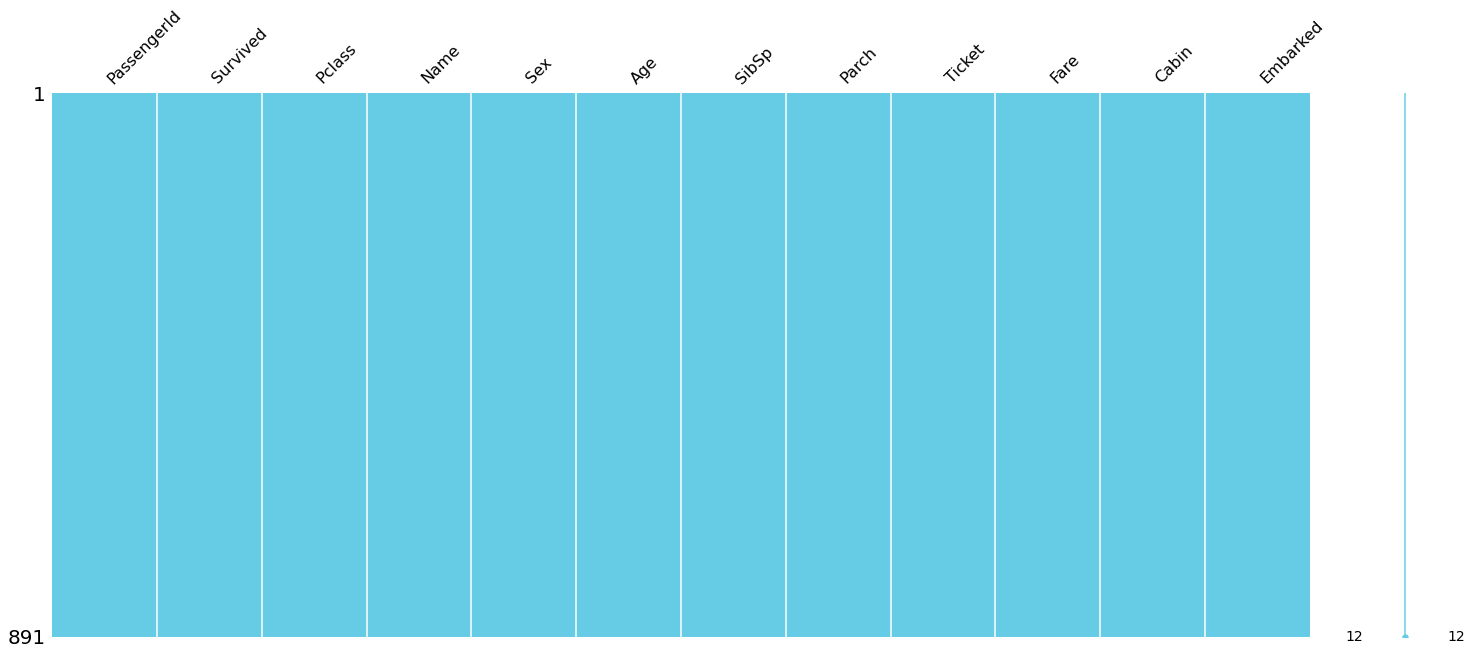

In [29]:
msno.matrix(df.sample(891),color=(0.4, 0.8, 0.9))
plt.show()

In [30]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


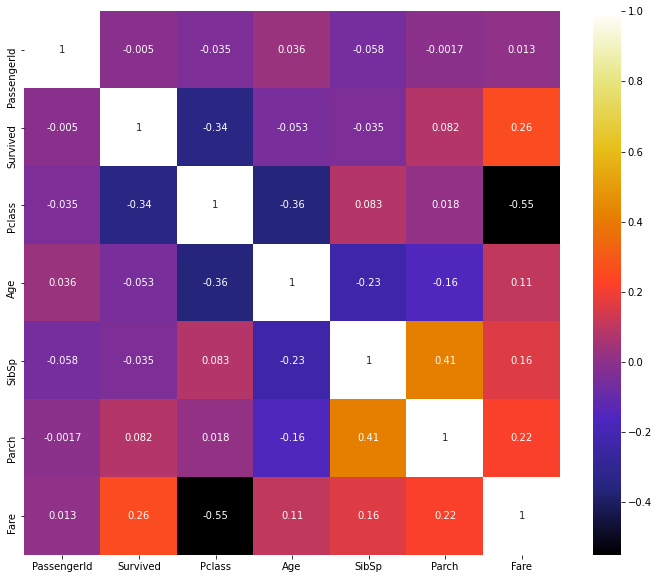

In [31]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='CMRmap', annot = True) 
plt.show()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


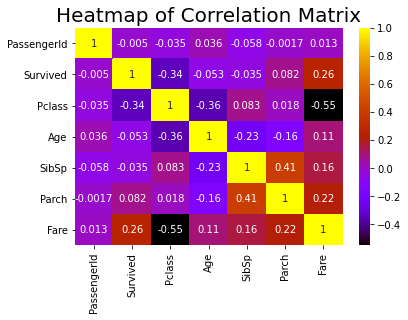

In [32]:
corr = df.corr()
sns.heatmap((corr),
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,cmap='gnuplot',annot=True,fmt=".2g")
plt.title('Heatmap of Correlation Matrix', fontsize=20)
corr

In [33]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,29.117486,0.553734,0.329690,22.117887
1,444.368421,1.950292,27.683246,0.473684,0.464912,48.395408


In [34]:
df.groupby('Survived').var()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,67933.454110,0.541409,162.769475,1.659972,0.677602,985.219509
1,63684.984102,0.745322,191.883843,0.502238,0.595539,4435.160158


In [35]:
df.groupby('Survived').std()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,260.640469,0.735805,12.758114,1.288399,0.823166,31.388207
1,252.358840,0.863321,13.852214,0.708688,0.771712,66.596998


In [36]:
df.groupby('Survived').cov()

PassengerId     Pclass  ...     Parch         Fare
Survived                                       ...                       
0        PassengerId  67933.454110   9.816082  ... -3.405050  -693.177748
         Pclass           9.816082   0.541409  ...  0.041479   -11.949161
         Age             25.873983  -3.767894  ... -0.741360    30.785010
         SibSp          -22.821138   0.119178  ...  0.506887    11.408593
         Parch           -3.405050   0.041479  ...  0.677602     8.973617
         Fare          -693.177748 -11.949161  ...  8.973617   985.219509
1        PassengerId  63684.984102 -36.462571  ...  4.798889  1579.473492
         Pclass         -36.462571   0.745322  ...  0.014380   -30.939233
         Age            276.893053  -4.719604  ... -2.996235   157.946046
         SibSp           -6.066523  -0.020374  ...  0.154499     5.799799
         Parch            4.798889   0.014380  ...  0.595539     5.988321
         Fare          1579.473492 -30.939233  ...  5.988321  4435.160158

[12 rows x 6 columns]

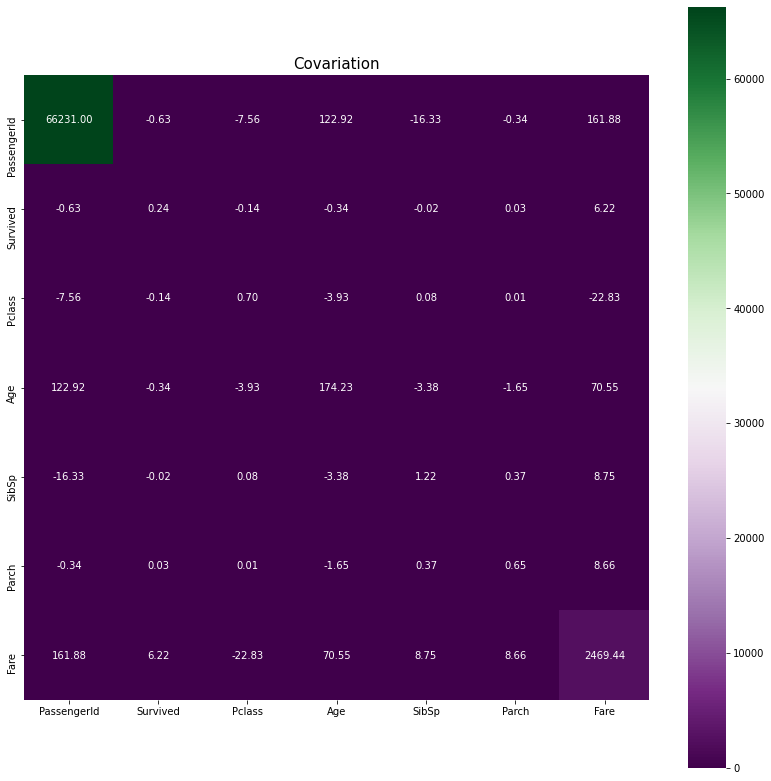

In [37]:
plt.figure(figsize=(14,14))
sns.heatmap(df.cov(), annot=True, fmt =".2f",square=True,cmap='PRGn')
plt.title("Covariation",fontsize = 15)
plt.show()

In [38]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

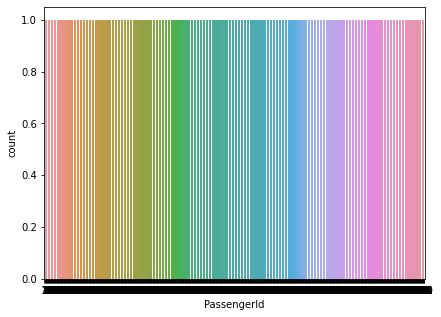

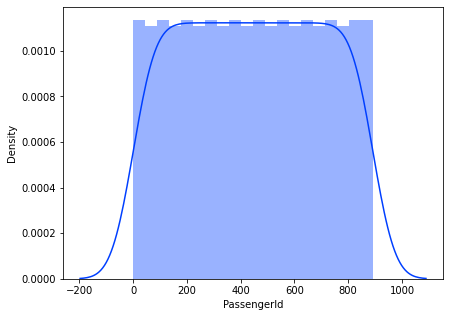

In [39]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-bright')

plt.subplot(1, 2, 1)
sns.countplot(df['PassengerId'])
plt.show()

plt.xlabel('PassengerId', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(df["PassengerId"], bins = 20)
plt.show()

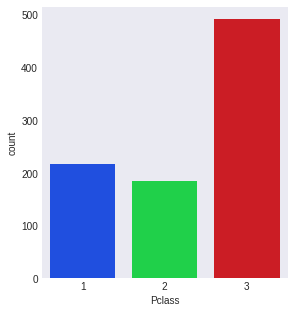

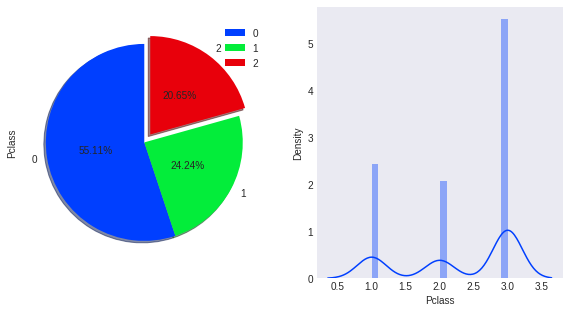

In [40]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-dark')

plt.subplot(1, 3, 1)
sns.countplot(df['Pclass'])
plt.show()

plt.xlabel('Pclass', fontsize = 15)

plt.subplot(1, 3, 2)
df['Pclass'].value_counts().plot(kind = 'pie', explode = [0, 0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1','2'], shadow = True, pctdistance = 0.5)
plt.legend()

plt.subplot(1, 3, 3)
sns.distplot(df["Pclass"], bins = 20)
plt.show()

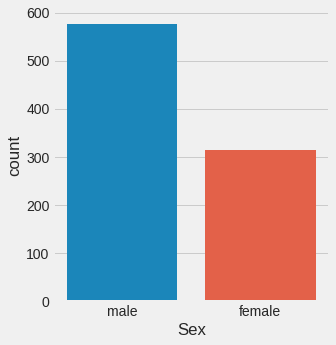

Text(0.5, 0.98, 'Gender Classfication')

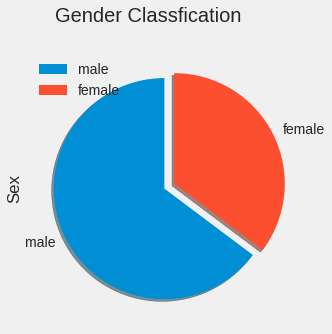

In [41]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.countplot(df['Sex'])
plt.show()

plt.xlabel('Sex', fontsize = 15)

plt.subplot(1, 3, 2)
df['Sex'].value_counts().plot(kind = 'pie', explode = [0, 0.1], startangle = 90,
                                        shadow = True, pctdistance = 0.5)
plt.legend()

plt.suptitle('Gender Classfication', fontsize = 20)

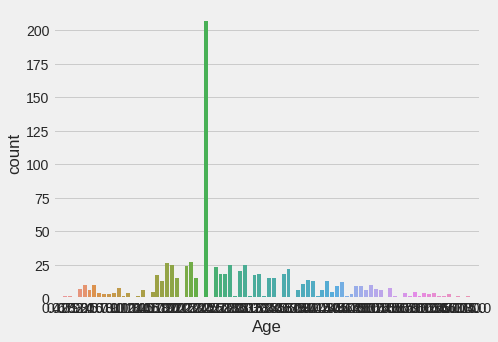

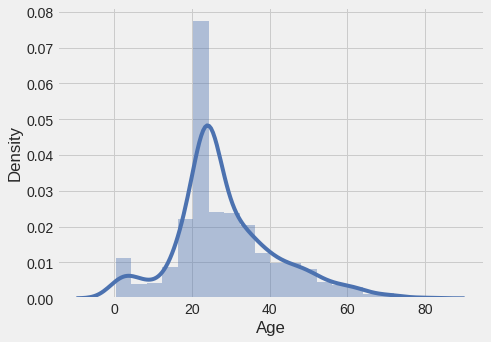

In [42]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-deep')

plt.subplot(1, 2, 1)
sns.countplot(df['Age'])
plt.show()

plt.xlabel('Age', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(df["Age"], bins = 20)
plt.show()

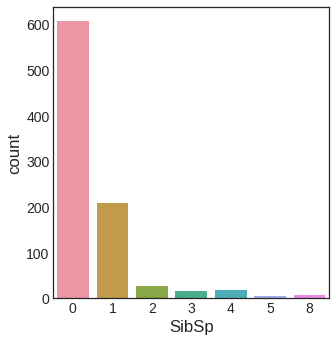

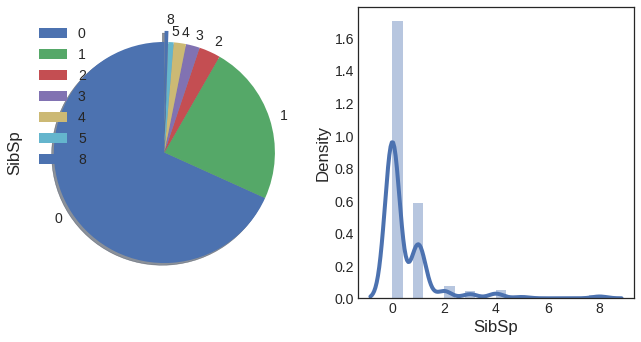

In [43]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-white')

plt.subplot(1, 3, 1)
sns.countplot(df['SibSp'])
plt.show()

plt.xlabel('SibSp', fontsize = 15)

plt.subplot(1, 3, 2)
df['SibSp'].value_counts().plot(kind = 'pie', explode = [0, 0, 0, 0, 0, 0, 0.1], startangle = 90,
                                       labels = ['0','1','2','3','4','5','8'], shadow = True, pctdistance = 0.5)
plt.legend()

plt.subplot(1,3,3)
sns.distplot(df["SibSp"], bins = 20)
plt.show()

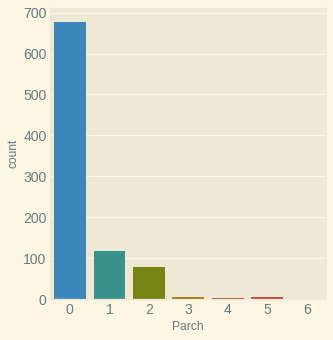

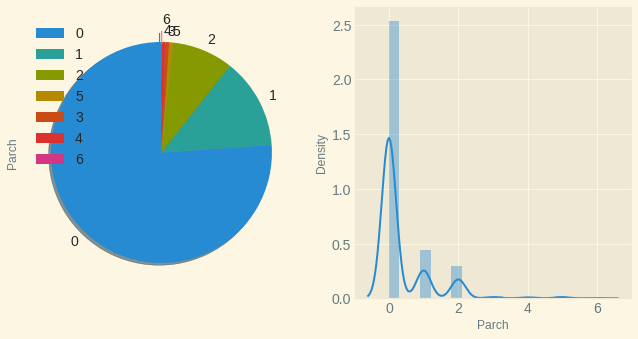

In [44]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('Solarize_Light2')

plt.subplot(1, 3, 1)
sns.countplot(df['Parch'])
plt.show()

plt.xlabel('Parch', fontsize = 15)

plt.subplot(1, 3, 2)
df['Parch'].value_counts().plot(kind = 'pie', explode = [0, 0, 0, 0, 0, 0, 0.1], startangle = 90,
                                        shadow = True, pctdistance = 0.5)
plt.legend()

plt.subplot(1,3,3)
sns.distplot(df["Parch"], bins = 20)
plt.show()

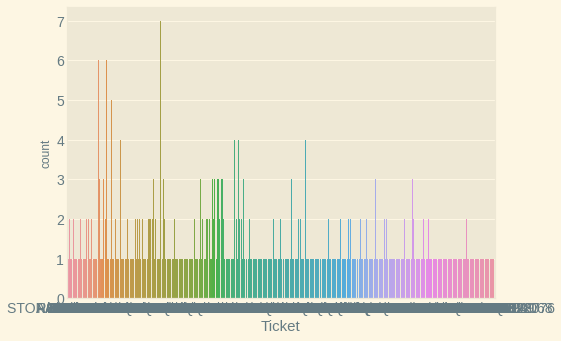

In [45]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-pastel')

plt.subplot(1, 2, 1)
sns.countplot(df['Ticket'])
plt.xlabel('Ticket', fontsize = 15)
plt.show()

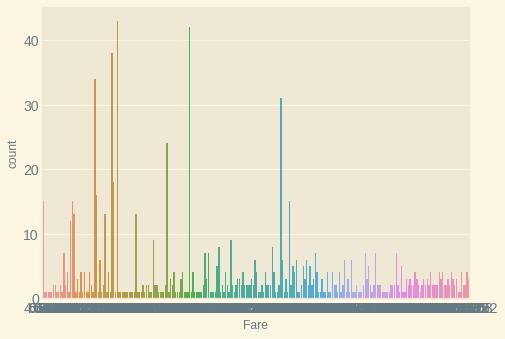

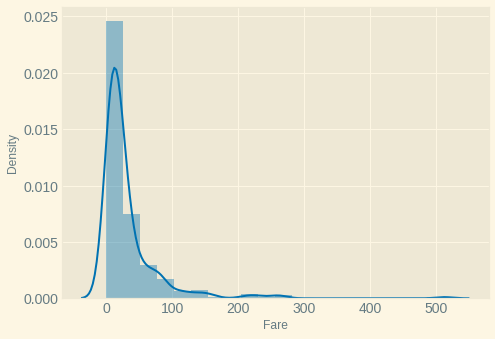

In [46]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-colorblind')

plt.subplot(1, 2, 1)
sns.countplot(df['Fare'])
plt.show()

plt.xlabel('Fare', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(df["Fare"], bins = 20)
plt.show()

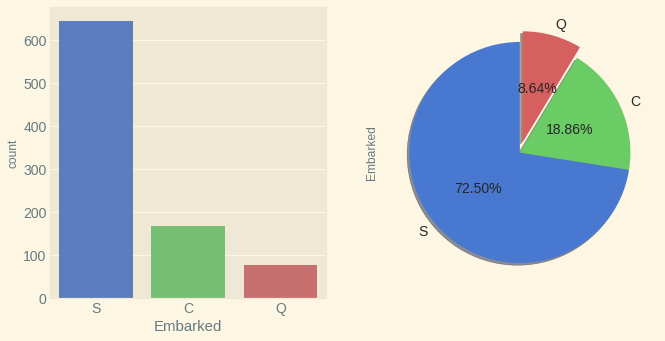

In [47]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-muted')

plt.subplot(1, 3, 1)
sns.countplot(df['Embarked'])
plt.xlabel('Embarked', fontsize = 15)

plt.subplot(1, 3, 2)
df['Embarked'].value_counts().plot(kind = 'pie', explode = [0, 0, 0.1],autopct='%.2f%%', startangle = 90,
                                       labels=['S','C','Q'], shadow = True, pctdistance = 0.5)

In [48]:
sns.set_style(style='white')

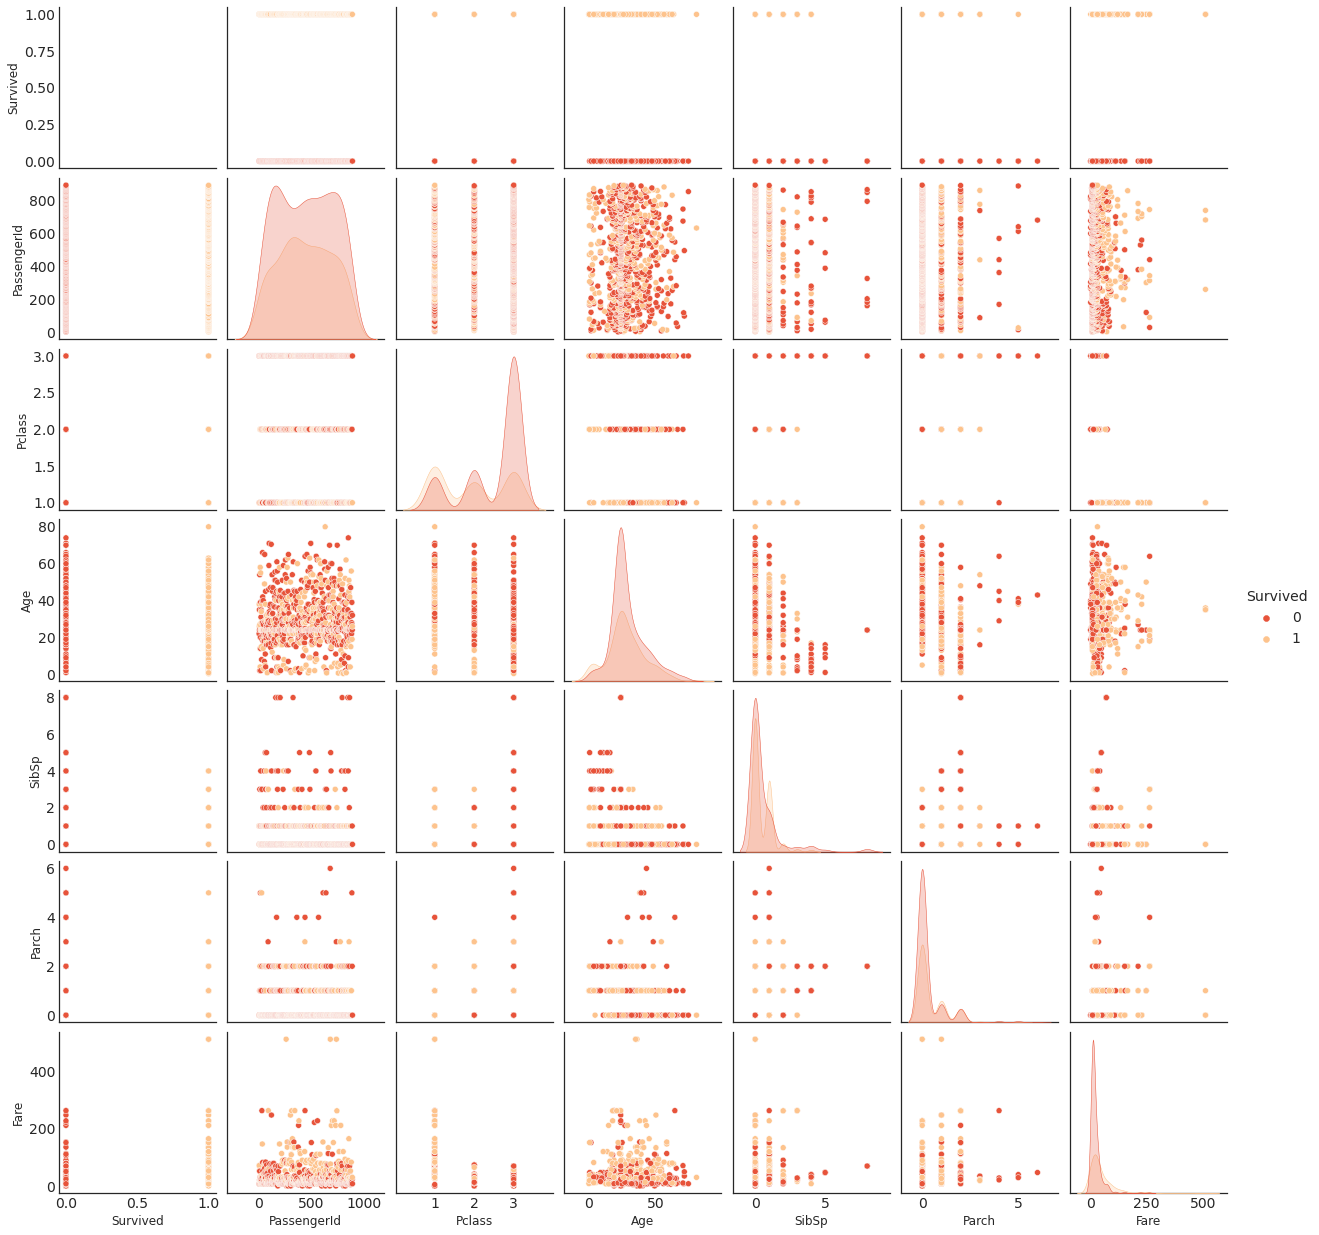

In [49]:
sns.pairplot(df,
             x_vars = ['Survived', 'PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
             y_vars = ['Survived', 'PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
       diag_kind='kde', hue='Survived',palette="OrRd_r"
             )
plt.show()

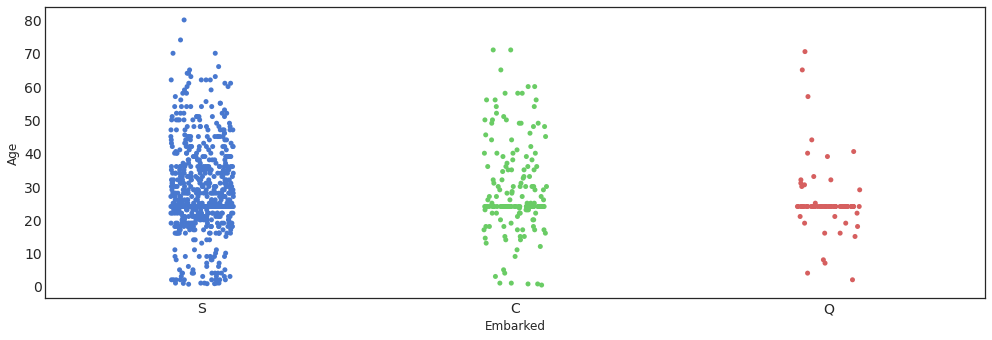

In [50]:
sns.stripplot(y='Age', x='Embarked', data=df)
plt.show()

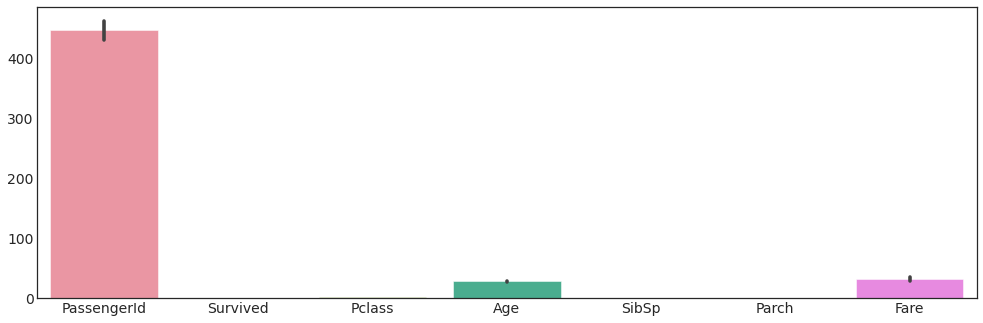

In [51]:
sns.barplot(data=df)
plt.show()

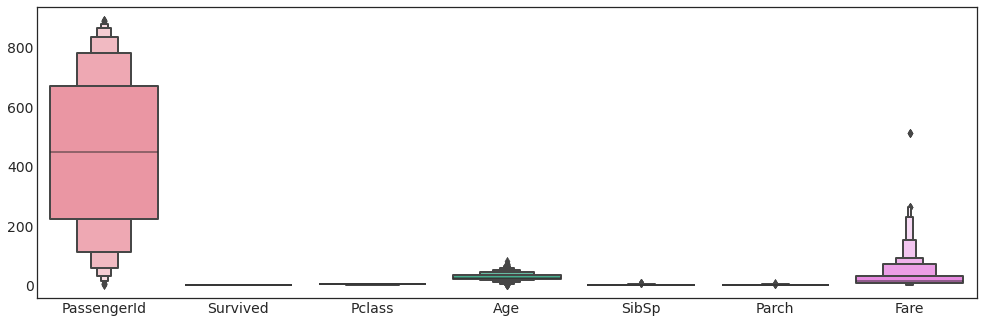

In [52]:
sns.boxenplot(data=df)
plt.show()

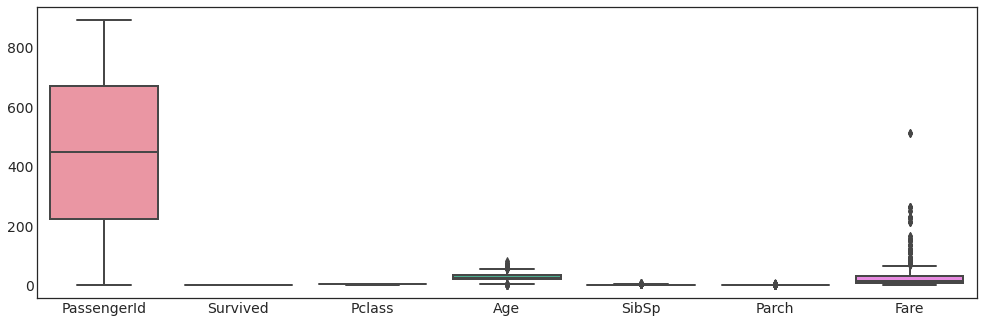

In [53]:
sns.boxplot(data=df)
plt.show()

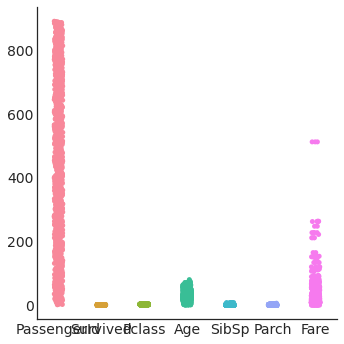

In [54]:
sns.catplot(data=df)
plt.show()

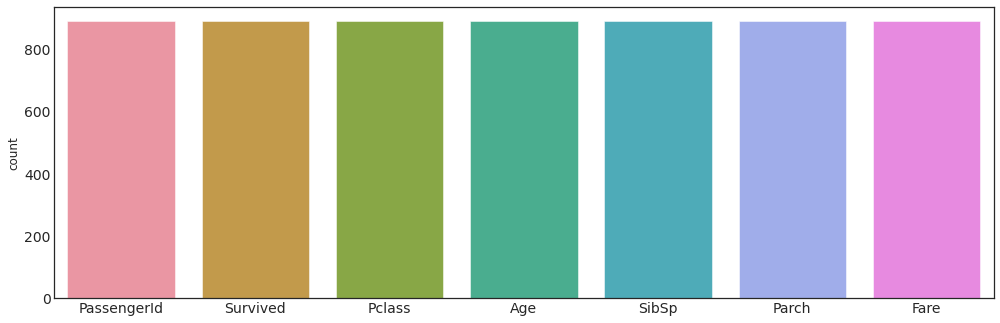

In [55]:
sns.countplot(data=df)
plt.show()

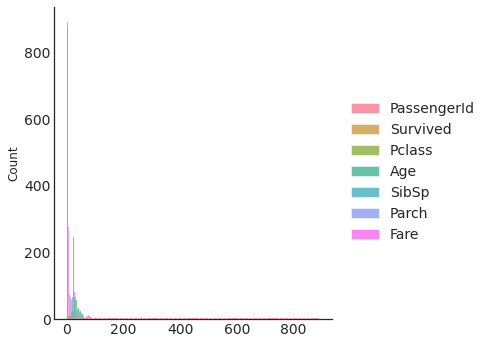

In [56]:
sns.displot(df)
plt.show()

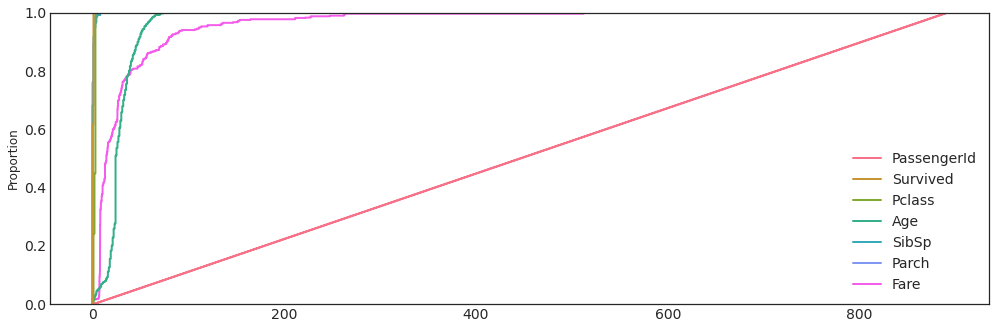

In [57]:
sns.ecdfplot(df)
plt.show()

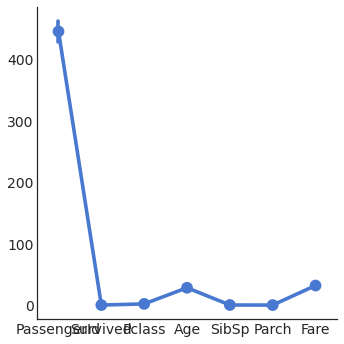

In [58]:
sns.factorplot(data=df)
plt.show()

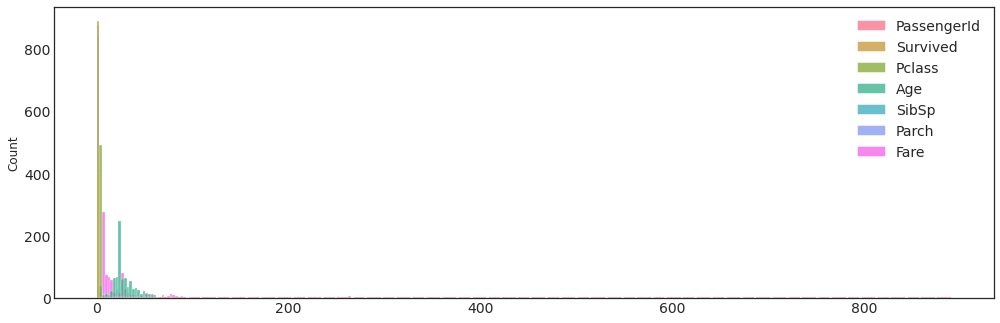

In [59]:
sns.histplot(df)
plt.show()

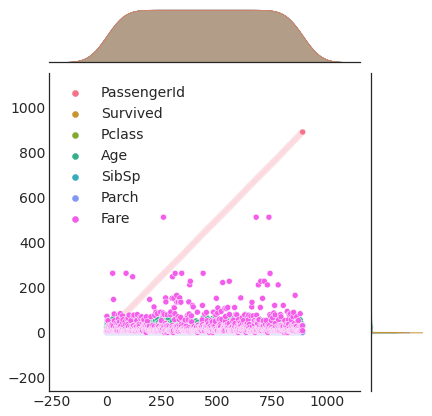

In [60]:
sns.jointplot(data=df)
plt.show()

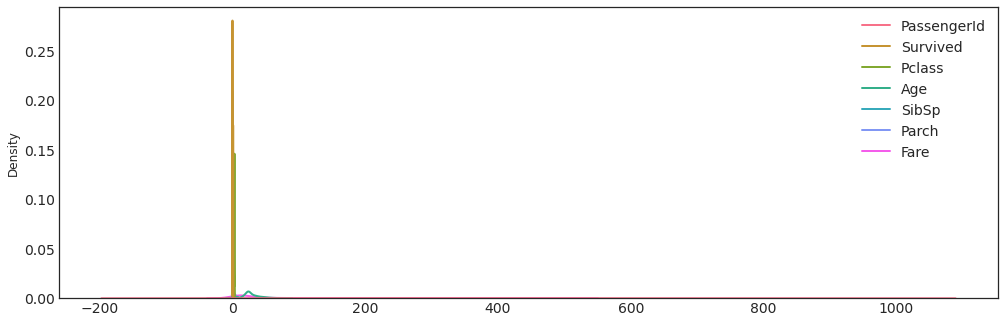

In [61]:
sns.kdeplot(data=df)
plt.show()

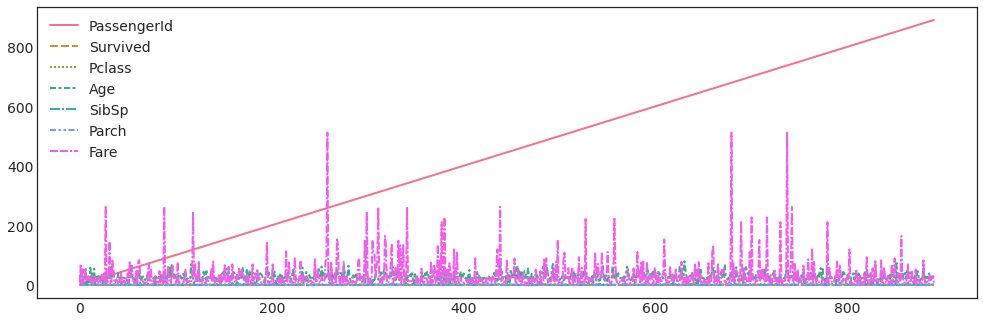

In [62]:
sns.lineplot(data=df)
plt.show()

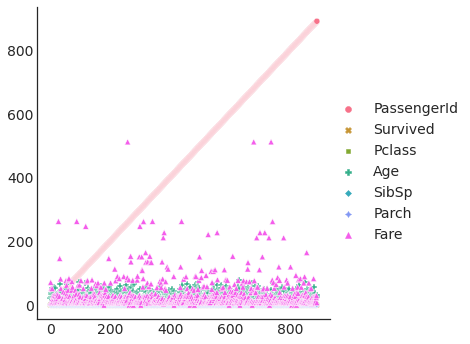

In [63]:
sns.relplot(data=df)
plt.show()

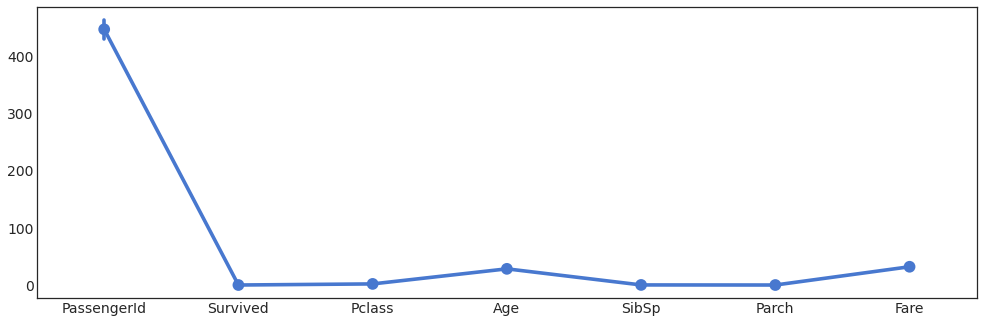

In [64]:
sns.pointplot(data=df)
plt.show()

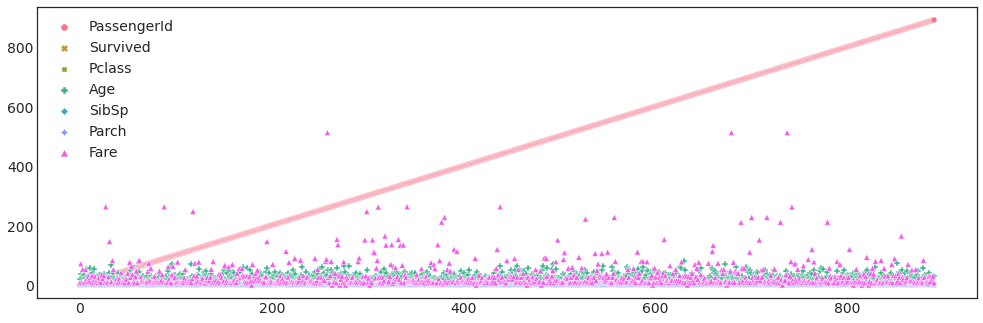

In [65]:
sns.scatterplot(data=df)
plt.show()

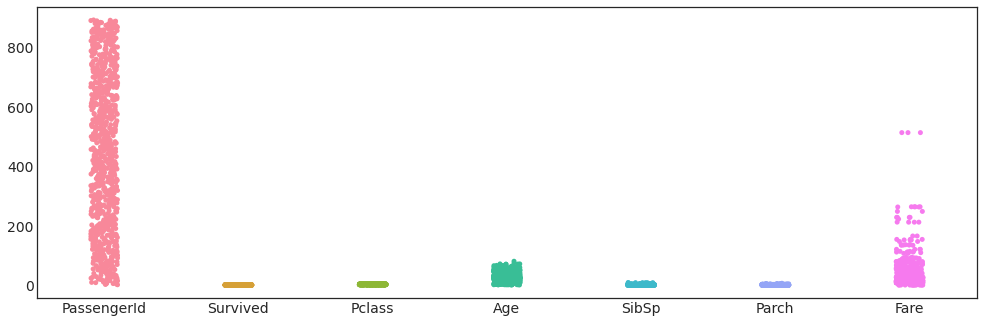

In [66]:
sns.stripplot(data=df)
plt.show()

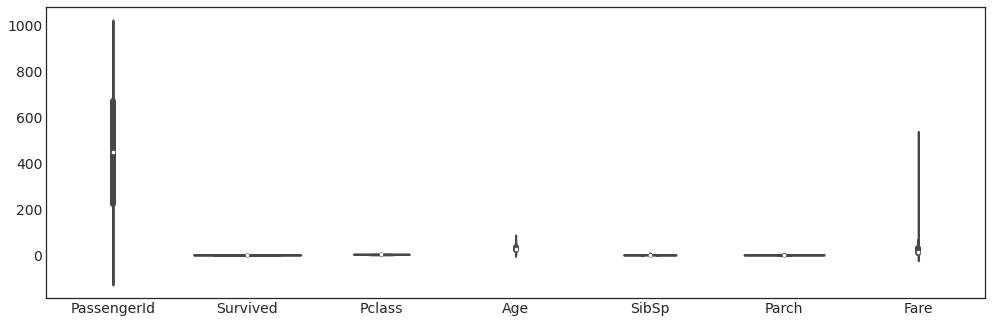

In [67]:
sns.violinplot(data=df)
plt.show()

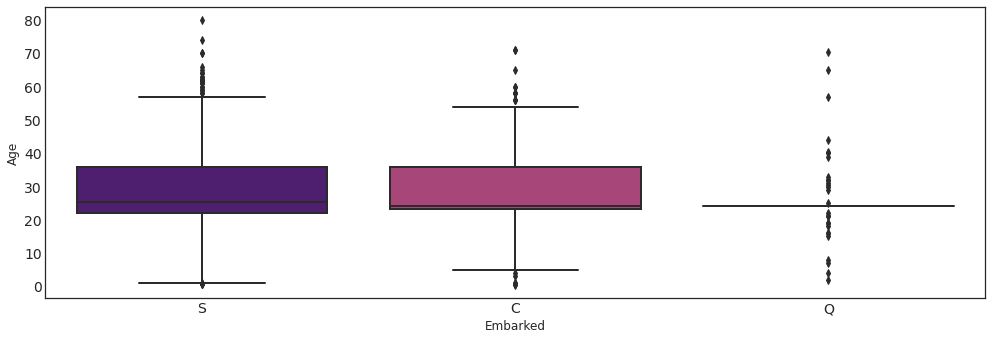

In [68]:
sns.boxplot(y='Age', x='Embarked', data = df, palette = 'magma')
plt.show()

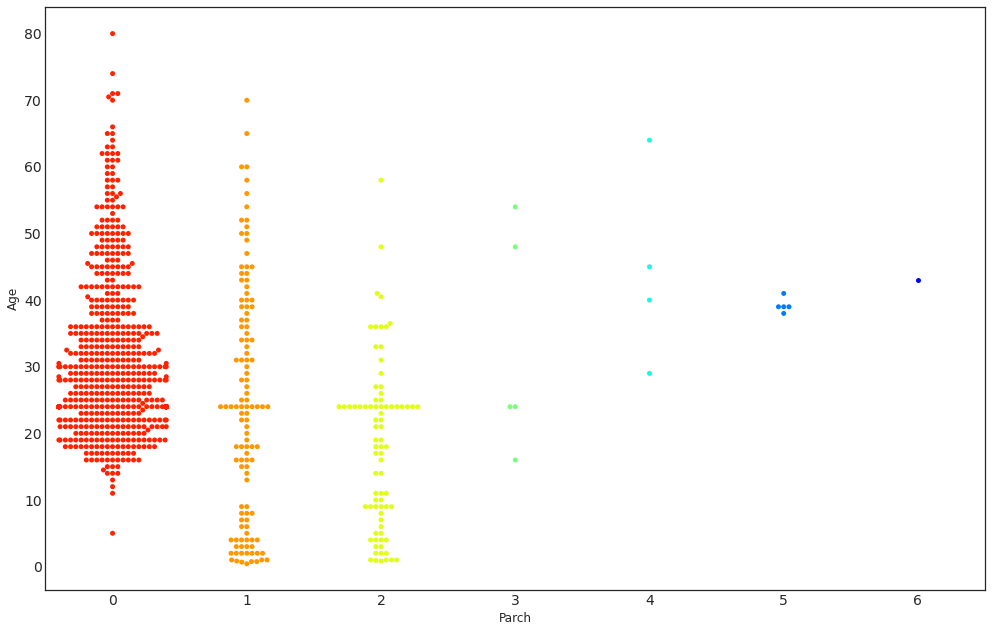

In [69]:
plt.figure(figsize=(15,10))
sns.swarmplot(x = "Parch", y = "Age", data = df, palette = 'jet_r')
plt.show()

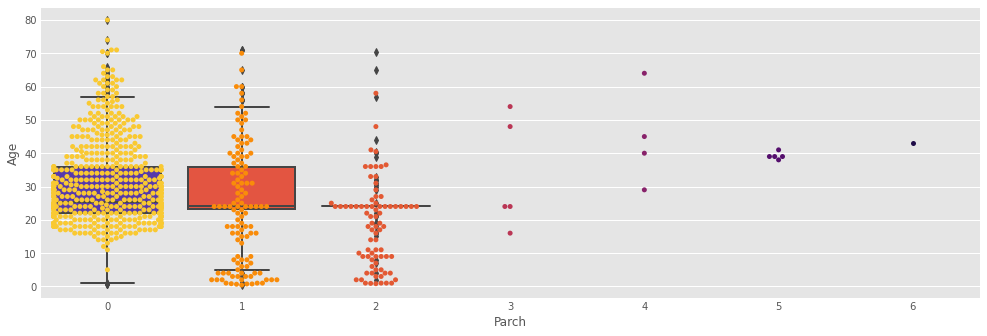

In [70]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

sns.boxplot(y='Age', x='Embarked', data = df, palette = 'CMRmap')
sns.swarmplot(x = "Parch", y = "Age", data = df, palette = 'inferno_r')
plt.show()

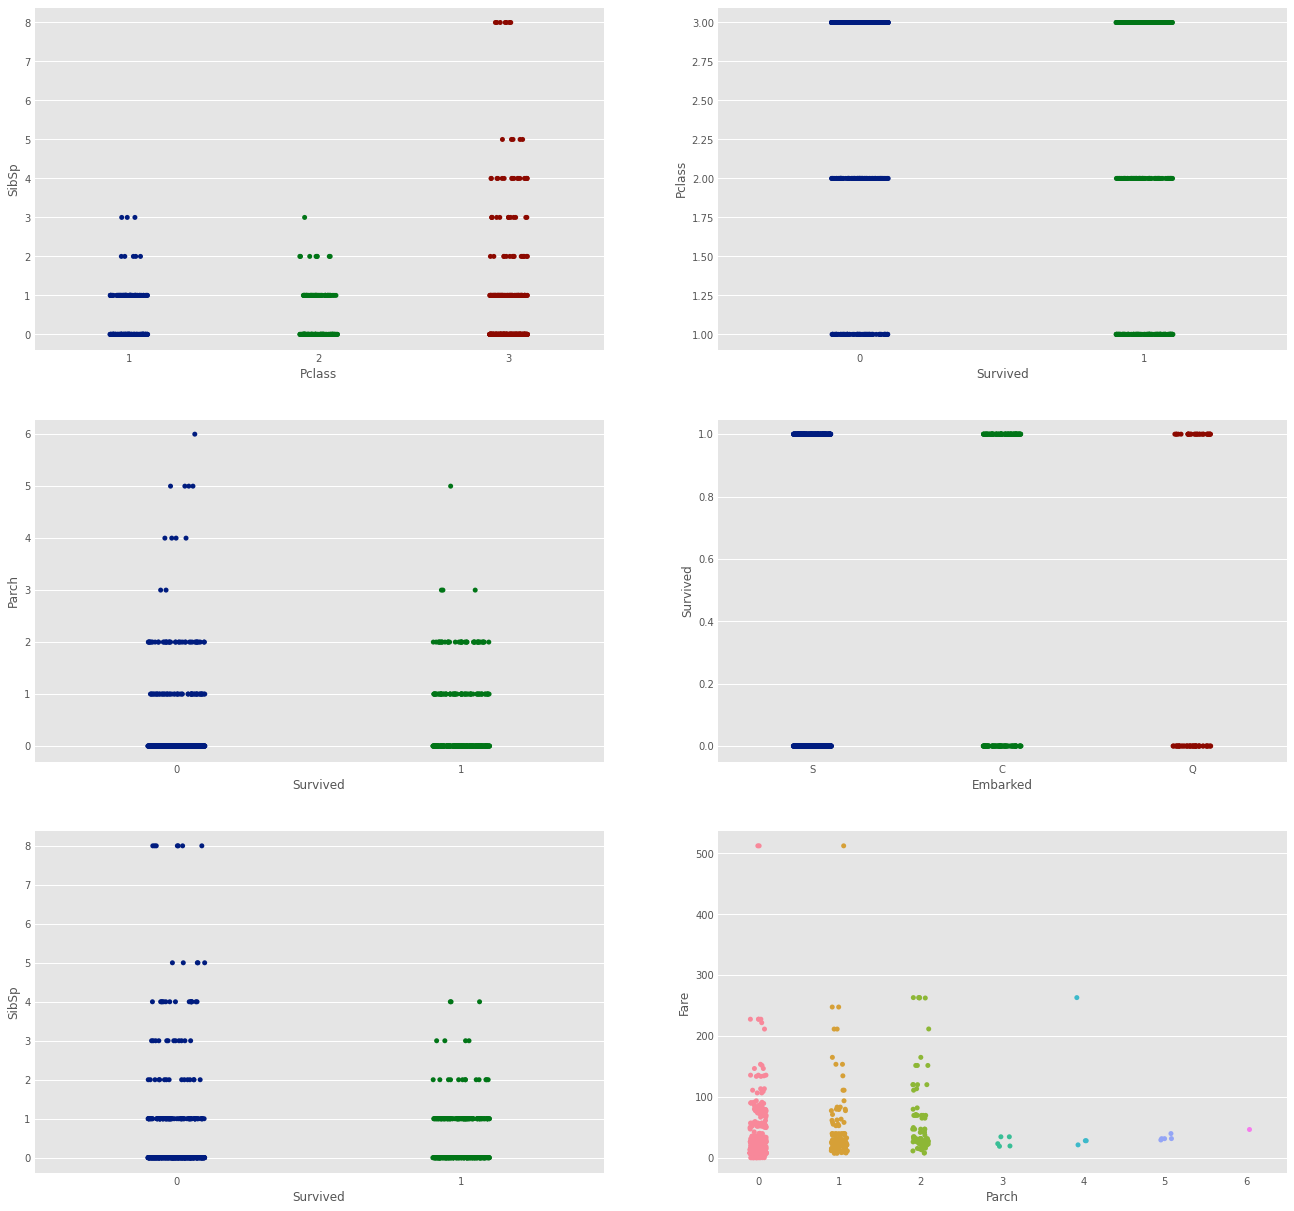

In [71]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-dark-palette')

fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.stripplot(y='SibSp', x='Pclass', data=df, hue=None, ax=axarr[0][0])
sns.stripplot(y='Survived', x='Embarked', data=df, hue=None, ax=axarr[1][1])
sns.stripplot(y='Parch', x='Survived', data=df, hue=None, ax=axarr[1][0])
sns.stripplot(y='Pclass', x='Survived', data=df, hue=None,  ax=axarr[0][1])
sns.stripplot(y='SibSp', x='Survived', data=df, hue=None, ax=axarr[2][0])
sns.stripplot(y='Fare', x='Parch', data=df, hue=None, ax=axarr[2][1])
plt.show()

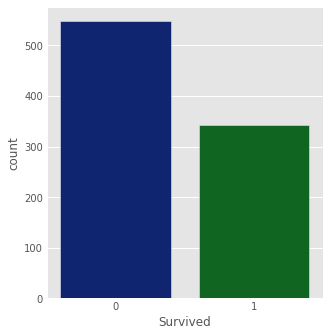

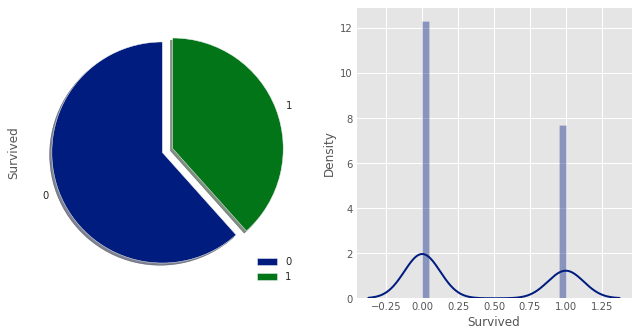

In [72]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-dark-palette')

plt.subplot(1, 3, 1)
sns.countplot(df['Survived'])
plt.show()

plt.xlabel('Survived', fontsize = 15)

plt.subplot(1, 3, 2)
df['Survived'].value_counts().plot(kind = 'pie', explode = [0, 0.1], startangle = 90,
                                        labels=['0','1'],shadow = True, pctdistance = 0.5)
plt.legend()

plt.subplot(1,3,3)
sns.distplot(df["Survived"], bins = 20)
plt.show()

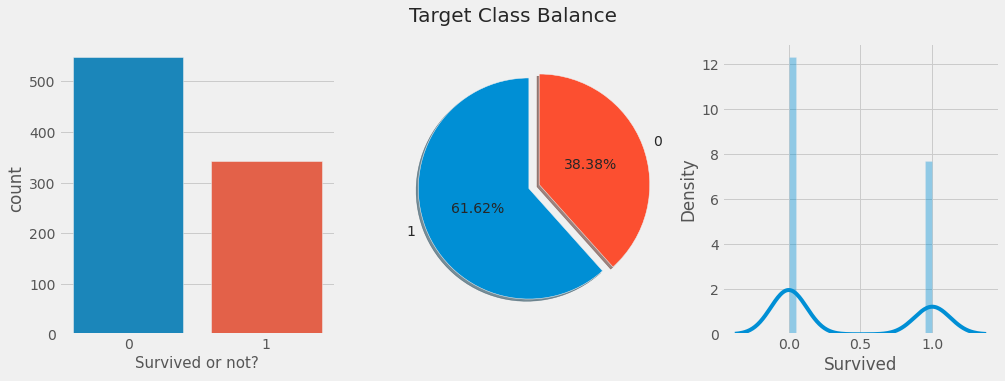

In [73]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')


plt.suptitle('Target Class Balance', fontsize = 20)

plt.subplot(1, 3, 1)
sns.countplot(df['Survived'],)

plt.xlabel('Survived or not?', fontsize = 15)

plt.subplot(1, 3, 2)
df['Survived'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.subplot(1, 3, 3)
sns.distplot(df["Survived"], bins = 20)
plt.show()

In [74]:
fig = px.histogram(df, 
                   x='Sex', 
                   marginal='box',
                   color='Survived',
                   nbins=47, 
                   title='Gender VS Survival Rate')
fig.update_layout(bargap=0.1)
fig.show()

In [75]:
fig = px.histogram(df, 
                   x='Age', 
                   marginal='box',
                   color='Survived',
                   nbins=47, 
                   title='Age VS Survival Rate')
fig.update_layout(bargap=0.1)
fig.show()

In [76]:
fig = px.histogram(df, 
                   x='Fare', 
                   marginal='box',
                   color='Survived',
                   nbins=47, 
                   title='Fare vs Survival Rate')
fig.update_layout(bargap=0.1)
fig.show()

In [77]:
fig = px.scatter(df,
                 x='Fare',  
                 y='Age', 
                 color='Survived', 
                 opacity=0.7, 
                 hover_data=['Sex'], 
                 title='Fare VS Age')
fig.update_traces(marker_size=5)
fig.show()

In [78]:
fig = px.scatter(df,
                 y='Cabin',  
                 x='Pclass', 
                 color='Embarked', 
                 opacity=0.7, 
                 hover_data=['Sex','Survived'], 
                 title='Cabin VS Passenger Class')
fig.update_traces(marker_size=5)
fig.show()

PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked

In [79]:
from sklearn.preprocessing import LabelEncoder
label_enc =LabelEncoder()

In [80]:
df.Sex =label_enc.fit_transform(df.Sex)
df.Embarked =label_enc.fit_transform(df.Embarked)

In [81]:
label_enc.classes_

array(['C', 'Q', 'S'], dtype=object)

In [82]:
x = df.drop(['Survived','Name','Ticket','Cabin'], axis=1)
y = df['Survived']

In [83]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 9)

In [84]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
pred = model.predict(xtest)

In [86]:
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0])

In [87]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [88]:
print("Accuracy Score :",accuracy_score(ytest,pred),'\n')
print("Recall Score",recall_score(ytest,pred),'\n')
print("Precision Score :",precision_score(ytest,pred),'\n')
print("F1 Score :",f1_score(ytest,pred),'\n')

Accuracy Score : 0.7686567164179104 

Recall Score 0.7358490566037735 

Precision Score : 0.6964285714285714 

F1 Score : 0.7155963302752294 



In [89]:
cm = confusion_matrix(ytest, pred)

print(cm,"\n")

print(classification_report(ytest, pred))

[[128  34]
 [ 28  78]] 

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       162
           1       0.70      0.74      0.72       106

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

